# Connect to G-Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Change Notebook Default Directory

In [ ]:
import os
file_dir = "/content/drive/MyDrive/Data Science/Python/DS Projek II"
os.chdir(file_dir)

In [ ]:
!ls

DSP_2_Data_Visualization.ipynb	ecommerce_preprocessed.gsheet
ecommerce_dataset.csv		Sandbox_DSP_2_Data_Visualization.ipynb
ecommerce_preprocessed.csv


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [ ]:
df = pd.read_csv('ecommerce_dataset.csv')
df.head()

<ipython-input-15-4f1109575f20>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ecommerce_dataset.csv')


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region',
       'Months'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51303 non-null  object 
 1   Order Date        51303 non-null  object 
 2   Ship Date         51303 non-null  object 
 3   Aging             51302 non-null  float64
 4   Ship Mode         51303 non-null  object 
 5   Product Category  51303 non-null  object 
 6   Product           51303 non-null  object 
 7   Sales             51303 non-null  object 
 8   Quantity          51302 non-null  object 
 9   Discount          51303 non-null  object 
 10  Profit            51303 non-null  object 
 11  Shipping Cost     51303 non-null  object 
 12  Order Priority    51301 non-null  object 
 13  Customer ID       51302 non-null  object 
 14  Customer Name     51303 non-null  object 
 15  Segment           51302 non-null  object 
 16  City              51303 non-null  object

In [ ]:
df.isna().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

## Missing Values Handling

In [ ]:
df.isna().sum().loc[lambda x: x > 0]

Aging             1
Quantity          1
Order Priority    2
Customer ID       1
Segment           1
Region            1
dtype: int64

In [ ]:
cols_contain_null = list(df.isna().sum().loc[lambda x: x > 0].index)
cols_contain_null

['Aging', 'Quantity', 'Order Priority', 'Customer ID', 'Segment', 'Region']

see [here](https://datatofish.com/rows-with-nan-pandas-dataframe/)

In [ ]:
df[df.isna().any(axis=1)]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
27,AU-2015-28,2015-09-29,2015-10-05,NaN,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.03,...,$5.60,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep
95,AU-2015-96,2015-04-10,2015-04-15,5.0,First Class,Auto & Accessories,Bike Tyres,$72.00,NaN,0.01,...,$3.60,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr
117,AU-2015-118,2015-08-16,2015-08-17,1.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
131,AU-2015-132,2015-08-12,2015-08-15,3.0,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.05,...,$1.40,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug
370,AU-2015-371,2015-11-21,2015-11-25,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
625,AU-2015-626,2015-02-03,2015-02-05,2.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.03,...,$14.00,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,1,0.01,...,$14.90,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [ ]:
df.loc[df.Aging.isna()] # = 8

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
27,AU-2015-28,2015-09-29,2015-10-05,NaN,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.03,...,$5.60,High,NG-0028,Harris Armstrong,Corporate,Jinan,Shandong,China,North Asia,Sep


In [ ]:
df.loc[df.Quantity.isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
95,AU-2015-96,2015-04-10,2015-04-15,5.0,First Class,Auto & Accessories,Bike Tyres,$72.00,NaN,0.01,...,$3.60,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr


In [ ]:
df[df.Product=="Bike Tyres"].head(3)

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
5,AU-2015-6,2015-02-25,2015-03-05,8.0,First Class,Auto & Accessories,Bike Tyres,$72.00,3,0.04,...,$2.40,Critical,TO-006,Carter Barreto,Corporate,Bytom,Silesia,Poland,EMEA,Feb
14,AU-2015-15,2015-10-12,2015-10-21,9.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.01,...,$1.80,Medium,EY-0015,Greene Decherney,Consumer,Brisbane,Queensland,Australia,Oceania,Oct
23,AU-2015-24,2015-11-22,2015-11-24,2.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.02,...,$1.80,Critical,CO-0024,Copeland Lomonaco,Corporate,Celle,Lower Saxony,Germany,Central,Nov


In [ ]:
df.loc[df.Quantity.isna()] # = 2

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
95,AU-2015-96,2015-04-10,2015-04-15,5.0,First Class,Auto & Accessories,Bike Tyres,$72.00,NaN,0.01,...,$3.60,Critical,ON-0096,Stokes Knudson,Consumer,Tupã,São Paulo,Brazil,South,Apr


In [ ]:
df.loc[df["Order Priority"].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
625,AU-2015-626,2015-02-03,2015-02-05,2.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.03,...,$14.00,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,1,0.01,...,$14.90,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [ ]:
df.loc[(df.Country=="Mexico") & (df.Region=="North")]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
8,AU-2015-9,2015-02-09,2015-02-16,7.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,5,0.03,...,$11.60,Critical,EN-009,Wall Olsen,Consumer,Juárez,Chihuahua,Mexico,North,Feb
36,AU-2015-37,2015-06-28,2015-07-04,6.0,First Class,Auto & Accessories,Car Media Players,$140.00,5,0.04,...,$3.20,Medium,KE-0037,Holt Glocke,Corporate,Puebla,Puebla,Mexico,North,Jun
49,AU-2015-50,2015-01-25,2015-01-30,5.0,First Class,Auto & Accessories,Tyre,$250.00,2,0.01,...,$16.50,Medium,RS-0050,Hernandez Badders,Home Office,Guaymas,Sonora,Mexico,North,Jan
60,AU-2015-61,2015-12-27,2016-01-05,9.0,First Class,Auto & Accessories,Car Mat,$54.00,5,0.01,...,$1.10,High,KS-0061,Flores Brooks,Home Office,Morelia,Michoacán,Mexico,North,Dec
101,AU-2015-102,2015-02-24,2015-02-26,2.0,First Class,Auto & Accessories,Car Body Covers,$117.00,3,0.03,...,$2.60,High,LL-00102,Marshall Carroll,Consumer,Milpa Alta,Distrito Federal,Mexico,North,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51030,FA-2015-30516,2015-09-10,2015-09-17,7.0,Standard Class,Fashion,Suits,$109.00,4,0.05,...,$0.70,Medium,ES-0040722,Robbins Hughes,Consumer,Morelia,Michoacán,Mexico,North,Sep
51032,FA-2015-30518,2015-07-13,2015-07-19,6.0,Standard Class,Fashion,Casula Shoes,$122.00,2,0.02,...,$3.70,Medium,AN-0040724,Lang Oakman,Corporate,Orizaba,Veracruz,Mexico,North,Jul
51159,FA-2015-30645,2015-08-26,2015-09-02,7.0,Standard Class,Fashion,T - Shirts,$248.00,4,0.03,...,$13.80,Medium,RY-0040851,Garrett Farry,Consumer,Progreso,Yucatán,Mexico,North,Aug
51160,FA-2015-30646,2015-03-20,2015-03-24,4.0,Standard Class,Fashion,Shirts,$196.00,1,0.02,...,$11.20,Medium,RN-0040852,Cook Bern,Consumer,Fresnillo de González Echeverría,Zacatecas,Mexico,North,Mar


In [ ]:
df.loc[df["Order Priority"].isna()] # = "Medium"

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
625,AU-2015-626,2015-02-03,2015-02-05,2.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.03,...,$14.00,NaN,TT-00626,Harper Dartt,Consumer,Coyoacán,Distrito Federal,Mexico,North,Feb
791,AU-2015-792,2015-04-27,2015-05-01,4.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,1,0.01,...,$14.90,NaN,IS-00792,Navarro Preis,Consumer,Ciudad del Carmen,Campeche,Mexico,North,Apr


In [ ]:
df["Order Priority"].value_counts()

Medium      29446
High        15499
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [ ]:
df["Order Priority"].mode()

0    Medium
Name: Order Priority, dtype: object

In [ ]:
df.loc[df["Segment"].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
131,AU-2015-132,2015-08-12,2015-08-15,3.0,First Class,Auto & Accessories,Bike Tyres,$72.00,5,0.05,...,$1.40,Critical,DT-00132,Rojas Schmidt,NaN,Los Angeles,California,United States,West,Aug


In [ ]:
df["Segment"].value_counts()

Consumer       26518
Corporate      15429
Home Office     9355
Name: Segment, dtype: int64

In [ ]:
df[df["Customer Name"] == "Rojas Schmidt"][["Customer Name", "Segment"]].head(2)

,Customer Name,Segment
131,Rojas Schmidt,NaN
1232,Rojas Schmidt,Home Office


In [ ]:
df.loc[df["Customer ID"].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,2015-11-21,2015-11-25,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov


In [ ]:
df.loc[df["Customer Name"] == "Herman Triggs"]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,2015-11-21,2015-11-25,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov
825,AU-2015-826,2015-07-26,2015-08-01,6.0,First Class,Auto & Accessories,Car Mat,$54.00,5,0.05,...,$1.10,High,GS-00826,Herman Triggs,Consumer,Koidu,Eastern,Sierra Leone,Africa,Jul
853,AU-2015-854,2015-10-10,2015-10-13,3.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,2,0.03,...,$2.70,High,GS-00854,Herman Triggs,Consumer,Newark,Ohio,United States,East,Oct
1138,AU-2015-1139,2015-01-22,2015-01-28,6.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.01,...,$16.00,High,GS-001139,Herman Triggs,Consumer,Koidu,Eastern,Sierra Leone,Africa,Jan
1266,AU-2015-1267,2015-09-05,2015-09-15,10.0,First Class,Auto & Accessories,Car Mat,$54.00,4,0.05,...,$1.40,High,GS-001267,Herman Triggs,Consumer,Hyderabad,Telangana,India,Central Asia,Sep
2781,AU-2015-2782,2015-11-01,2015-11-09,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.05,...,$5.30,High,GS-002782,Herman Triggs,Consumer,Newark,Ohio,United States,East,Nov
2789,AU-2015-2790,2015-05-06,2015-05-08,2.0,First Class,Auto & Accessories,Car Pillow & Neck Rest,$231.00,2,0.01,...,$14.60,High,GS-002790,Herman Triggs,Consumer,Koidu,Eastern,Sierra Leone,Africa,May
3031,AU-2015-3032,2015-01-10,2015-01-12,2.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,1,0.03,...,$3.10,High,GS-003032,Herman Triggs,Consumer,Newark,Ohio,United States,East,Jan
3391,AU-2015-3392,2015-01-17,2015-01-23,6.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,5,0.02,...,$2.30,High,GS-003392,Herman Triggs,Consumer,Newark,Ohio,United States,East,Jan
4009,AU-2015-4010,2015-01-19,2015-01-29,10.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.01,...,$16.80,High,GS-004010,Herman Triggs,Consumer,Newark,Ohio,United States,East,Jan


In [ ]:
# df.loc[(df["Customer Name"] == "Herman Triggs") & (df["City"] == "Lismore")]
df.loc[(df["Customer Name"] == "Herman Triggs") & (df["Country"] == "Australia")]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
370,AU-2015-371,2015-11-21,2015-11-25,4.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.02,...,$11.40,Medium,NaN,Herman Triggs,Consumer,Lismore,New South Wales,Australia,Oceania,Nov


In [ ]:
df.loc[df["Region"].isna()]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,2015-08-16,2015-08-17,1.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug


In [ ]:
df.loc[df["Country"] == "Italy"].head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
117,AU-2015-118,2015-08-16,2015-08-17,1.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,High,RI-00118,Ayala Molinari,Consumer,Turin,Piedmont,Italy,NaN,Aug
142,AU-2015-143,2015-03-23,2015-03-26,3.0,First Class,Auto & Accessories,Car Seat Covers,$114.00,4,0.05,...,$1.10,Critical,EY-00143,Robertson Coakley,Consumer,Barletta,Apulia,Italy,South,Mar
204,AU-2015-205,2015-04-06,2015-04-16,10.0,First Class,Auto & Accessories,Car Mat,$54.00,2,0.04,...,$2.70,Critical,RF-00205,Mejia Waldorf,Corporate,Pozzuoli,Campania,Italy,South,Apr
221,AU-2015-222,2015-05-06,2015-05-07,1.0,First Class,Auto & Accessories,Bike Tyres,$72.00,3,0.02,...,$2.40,Medium,LD-00222,Obrien Geld,Corporate,Prato,Tuscany,Italy,South,May
238,AU-2015-239,2015-07-17,2015-07-21,4.0,First Class,Auto & Accessories,Tyre,$250.00,4,0.01,...,$16.00,Medium,ON-00239,Frost Tron,Consumer,Bologna,Emilia-Romagna,Italy,South,Jul


In [ ]:
cols_contain_null
# df.loc[df.Aging.isna(), "Aging"] = 8.0
# df.loc[df.Quantity.isna(), "Quantity"] = 2
# df.loc[df["Order Priority"].isna(), "Order Priority"] = "Medium"
# df.loc[df["Customer ID"].isna(), "Customer ID"] = "GS-NaN"
# df.loc[df["Segment"].isna(), "Segment"] = "Home Office"
# df.loc[df["Region"].isna(), "Region"] = "South"

['Aging', 'Quantity', 'Order Priority', 'Customer ID', 'Segment', 'Region']

In [ ]:
df.loc[df.Aging.isna(), "Aging"] = 8
df.loc[df.Quantity.isna(), "Quantity"] = 2
df.loc[df["Order Priority"].isna(), "Order Priority"] = "Medium"
df.loc[df["Customer ID"].isna(), "Customer ID"] = "GS-NaN"
df.loc[df["Segment"].isna(), "Segment"] = "Home Office"
df.loc[df["Region"].isna(), "Region"] = "South"

What is Aging in e-commerce context?
[link](https://golocad.com/glossary/aging/#:~:text=Inventory%20aging%20is%20an%20e,average%20to%20sell%20its%20stock./)

In [ ]:
len(df)

51303

In [ ]:
df["Order ID"].nunique()

51294

In [ ]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
51294,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51295,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51296,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51297,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51298,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51299,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [ ]:
pd.to_datetime(df["Order Date"]).head()

0   2015-11-09
1   2015-06-30
2   2015-12-05
3   2015-05-09
4   2015-07-09
Name: Order Date, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(df["Ship Date"]).head()

0   2015-11-17
1   2015-07-02
2   2015-12-13
3   2015-05-16
4   2015-07-18
Name: Ship Date, dtype: datetime64[ns]

In [ ]:
pd.to_datetime(df["Ship Date"]).head() - pd.to_datetime(df["Order Date"]).head()

0   8 days
1   2 days
2   8 days
3   7 days
4   9 days
dtype: timedelta64[ns]

In [ ]:
df["Sales"].str.replace("[^\d.]","", regex =True).head()

0    140.00
1    211.00
2    117.00
3    118.00
4    250.00
Name: Sales, dtype: object

# Data Prepocessing
Preprocessing Idea:
1. Column Rename
2. Order Date dan Ship Date, ubdah data-type nya menjadi datetime
3. Simbol dollar di kolom
[
    "sales", "profit", "shipping_cost"
]
dibuang, tambahkan "($)" di nama kolom
4. Remove duplicated columns, keep "first"
5. Sesuaikan datatype setiap kolom

## Columns Renaming

In [ ]:
rename_mapper = {col:col.replace(" ", "_").lower() for col in df.columns}
df.rename(
    columns=rename_mapper,
    inplace=True
)

df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


## To Datetime datatype

In [ ]:
df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

In [ ]:
df[["order_date", "ship_date"]].head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  5 non-null      datetime64[ns]
 1   ship_date   5 non-null      datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 208.0 bytes


In [ ]:
df = df.sort_values(
    by=["order_id", "order_date", "ship_date"],
    ascending=[True, True, True],
    ignore_index=True
)

df.head(20)

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-10,2015-04-21,2015-05-01,10.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.02,...,$5.40,Critical,TT-0010,Shepard Witt,Consumer,Soyapango,San Salvador,El Salvador,Central,Apr
2,AU-2015-100,2015-08-06,2015-08-08,2.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.01,...,$5.90,Critical,CK-00100,Rivera Black,Consumer,Jakarta,Jakarta,Indonesia,Southeast Asia,Aug
3,AU-2015-1000,2015-08-07,2015-08-15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,1,0.04,...,$5.40,Critical,NT-001000,Heath O'Briant,Home Office,Aracaju,Sergipe,Brazil,South,Aug
4,AU-2015-1001,2015-09-12,2015-09-15,3.0,First Class,Auto & Accessories,Car Speakers,$211.00,4,0.04,...,$9.70,High,MS-001001,Oneill Williams,Consumer,Astrakhan',Astrakhan',Russia,EMEA,Sep
5,AU-2015-1002,2015-08-17,2015-08-24,7.0,First Class,Auto & Accessories,Car Body Covers,$117.00,3,0.04,...,$2.30,High,ER-001002,Mcmillan Weimer,Corporate,Sandy Springs,Georgia,United States,South,Aug
6,AU-2015-1003,2015-11-06,2015-11-14,8.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,4,0.03,...,$2.40,Critical,RD-001003,Bell Bickford,Consumer,Boulogne-Billancourt,Ile-de-France,France,Central,Nov
7,AU-2015-1004,2015-12-08,2015-12-15,7.0,First Class,Auto & Accessories,Tyre,$250.00,3,0.03,...,$14.80,High,ON-001004,Cox Blanton,Consumer,Strasbourg,Alsace,France,Central,Dec
8,AU-2015-1005,2015-11-24,2015-12-02,8.0,First Class,Auto & Accessories,Bike Tyres,$72.00,4,0.04,...,$1.80,Medium,ON-001005,Harvey Ellison,Consumer,Madrid,Madrid,Spain,South,Nov
9,AU-2015-1006,2015-02-16,2015-02-18,2.0,First Class,Auto & Accessories,Car Mat,$54.00,3,0.04,...,$1.80,High,ON-001006,Walsh Hamilton,Home Office,Katoomba,New South Wales,Australia,Oceania,Feb


## Remove "$" in ["sales", "profit", "shipping_cost" ]

In [ ]:
dollar_cols = ["sales", "profit", "shipping_cost"]
for col in dollar_cols:
  df[col] = (
      df[col]
      .str.replace("[^\d.]","", regex =True)
  )
  df.rename(columns={col: col+"($)"}, inplace=True)
print("Formatting & Renaming, Done!")

Formatting & Renaming, Done!


In [ ]:
df.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8.0,First Class,Auto & Accessories,Car Media Players,140.00,2,0.05,...,4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-10,2015-04-21,2015-05-01,10.0,First Class,Auto & Accessories,Car Media Players,140.00,2,0.02,...,5.40,Critical,TT-0010,Shepard Witt,Consumer,Soyapango,San Salvador,El Salvador,Central,Apr
2,AU-2015-100,2015-08-06,2015-08-08,2.0,First Class,Auto & Accessories,Car Media Players,140.00,1,0.01,...,5.90,Critical,CK-00100,Rivera Black,Consumer,Jakarta,Jakarta,Indonesia,Southeast Asia,Aug
3,AU-2015-1000,2015-08-07,2015-08-15,8.0,First Class,Auto & Accessories,Car Media Players,140.00,1,0.04,...,5.40,Critical,NT-001000,Heath O'Briant,Home Office,Aracaju,Sergipe,Brazil,South,Aug
4,AU-2015-1001,2015-09-12,2015-09-15,3.0,First Class,Auto & Accessories,Car Speakers,211.00,4,0.04,...,9.70,High,MS-001001,Oneill Williams,Consumer,Astrakhan',Astrakhan',Russia,EMEA,Sep


In [ ]:
df[["sales($)", "profit($)", "shipping_cost($)"]]

,sales($),profit($),shipping_cost($)
0,140.00,46.00,4.60
1,140.00,54.40,5.40
2,140.00,58.60,5.90
3,140.00,54.40,5.40
4,211.00,97.20,9.70
...,...,...,...
51298,78.00,26.00,2.60
51299,119.00,27.10,2.70
51300,124.00,40.30,4.00
51301,70.00,17.50,1.80


## Remove duplicated columns

In [ ]:
df[df.duplicated(keep=False)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
33292,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33293,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33294,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33295,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33296,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33297,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33298,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33299,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
33300,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [ ]:
df = df.drop_duplicates(keep='last', ignore_index=True)

In [ ]:
df[df.duplicated(keep=False)]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months


In [ ]:
df.order_id.nunique(), len(df)

(51294, 51295)

In [ ]:
df[df.order_id == "FA-2015-30775"]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
33291,FA-2015-30775,2015-12-01,2015-12-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec
33292,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [ ]:
df.drop(labels=33291, axis=0, inplace=True)

In [ ]:
df[df.order_id == "FA-2015-30775"]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
33292,FA-2015-30775,2016-01-02,2016-01-06,5.0,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [ ]:
df.order_id.nunique(), len(df)

(51294, 51294)

## Sesuaikan Datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51294 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  float64       
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales($)          51294 non-null  object        
 8   quantity          51294 non-null  object        
 9   discount          51294 non-null  object        
 10  profit($)         51294 non-null  object        
 11  shipping_cost($)  51294 non-null  object        
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

In [ ]:
dtype_mapper = {
    "sales($)":"float",
    "quantity":"int32",
    "discount":"float",
    "profit($)":"float",
    "shipping_cost($)":"float"
}

df = df.astype(dtype_mapper)

df.info()

ValueError: ignored

In [ ]:
df.quantity.value_counts()

4      6631
3      6564
5      6547
1      6542
2      6482
1      3756
3      3747
2      3728
5      3649
4      3647
abc       1
Name: quantity, dtype: int64

In [ ]:
df[df.quantity=="abc"]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
2468,AU-2015-322,2015-04-21,2015-04-24,3.0,First Class,Auto & Accessories,Car Mat,54.00,abc,0.02,...,5.40,Critical,CH-00322,May Französisch,Consumer,Casablanca,Grand Casablanca,Morocco,Africa,Apr


In [ ]:
df[df.quantity=="abc"].values

array([['AU-2015-322', Timestamp('2015-04-21 00:00:00'),
        Timestamp('2015-04-24 00:00:00'), 3.0, 'First Class',
        'Auto & Accessories', 'Car Mat', '54.00', 'abc', '0.02', '54.00',
        '5.40', 'Critical', 'CH-00322', 'May Französisch', 'Consumer',
        'Casablanca', 'Grand Casablanca', 'Morocco', 'Africa', 'Apr']],
      dtype=object)

In [ ]:
df[df.product == "Car Mat"]
# lol - error!
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.product.html

KeyError: ignored

In [ ]:
df[df["product"] == "Car Mat"][["product","sales($)", "quantity", "profit($)"]]

,product,sales($),quantity,profit($)
9,Car Mat,54.00,3,18.00
19,Car Mat,54.00,1,54.00
29,Car Mat,54.00,3,18.00
39,Car Mat,54.00,5,10.80
49,Car Mat,54.00,2,27.00
...,...,...,...,...
7472,Car Mat,54.00,5,10.80
7473,Car Mat,54.00,3,18.00
7482,Car Mat,54.00,4,13.50
7492,Car Mat,54.00,5,10.80


In [ ]:
car_mat = df[df["product"] == "Car Mat"]
car_mat.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
9,AU-2015-1006,2015-02-16,2015-02-18,2.0,First Class,Auto & Accessories,Car Mat,54.00,3,0.04,...,1.80,High,ON-001006,Walsh Hamilton,Home Office,Katoomba,New South Wales,Australia,Oceania,Feb
19,AU-2015-1015,2015-08-29,2015-09-05,7.0,First Class,Auto & Accessories,Car Mat,54.00,1,0.02,...,5.40,Critical,CH-001015,Banks Ducich,Corporate,Maryborough,Queensland,Australia,Oceania,Aug
29,AU-2015-1024,2015-09-15,2015-09-19,4.0,First Class,Auto & Accessories,Car Mat,54.00,3,0.05,...,1.80,Critical,IN-001024,Bowers Martin,Consumer,Noisy-le-Grand,Ile-de-France,France,Central,Sep
39,AU-2015-1033,2015-11-06,2015-11-11,5.0,First Class,Auto & Accessories,Car Mat,54.00,5,0.02,...,1.10,Medium,AN-001033,Pennington Van,Corporate,Kharkiv,Kharkiv,Ukraine,EMEA,Nov
49,AU-2015-1042,2015-05-06,2015-05-14,8.0,First Class,Auto & Accessories,Car Mat,54.00,2,0.01,...,2.70,High,BY-001042,Bailey Bixby,Consumer,Coral Springs,Florida,United States,South,May


In [ ]:
car_mat["sales($)"].nunique()

1

In [ ]:
df[df.quantity=="abc"]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
2468,AU-2015-322,2015-04-21,2015-04-24,3.0,First Class,Auto & Accessories,Car Mat,54.00,abc,0.02,...,5.40,Critical,CH-00322,May Französisch,Consumer,Casablanca,Grand Casablanca,Morocco,Africa,Apr


In [ ]:
df.loc[df.quantity=="abc", "quantity"] = 1

In [ ]:
df.loc[df.discount=="xxx"]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
1246,AU-2015-212,2015-09-02,2015-09-08,6.0,First Class,Auto & Accessories,Tyre,250.00,5,xxx,...,13.30,Medium,EE-00212,Norton Magee,Corporate,Bondy,Ile-de-France,France,Central,Sep


In [ ]:
# quantity still a string
my_mask = (
    (df["product"] == "Tyre") & \
    (df["ship_mode"] == "First Class") & \
    (df["product_category"] == "Auto & Accessories") & \
    (df["quantity"] == "5") & \
    (df["country"] == "France")
)
df.loc[my_mask]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
1246,AU-2015-212,2015-09-02,2015-09-08,6.0,First Class,Auto & Accessories,Tyre,250.00,5,xxx,...,13.30,Medium,EE-00212,Norton Magee,Corporate,Bondy,Ile-de-France,France,Central,Sep
2646,AU-2015-3380,2015-08-23,2015-08-25,2.0,First Class,Auto & Accessories,Tyre,250.00,5,0.04,...,12.00,High,UM-003380,Hood Mitchum,Home Office,Lunel,Languedoc-Roussillon,France,Central,Aug
2965,AU-2015-3668,2015-09-23,2015-10-01,8.0,First Class,Auto & Accessories,Tyre,250.00,5,0.03,...,13.30,High,IO-003668,Walter Seio,Consumer,Castres,Midi-Pyrénées,France,Central,Sep
3446,AU-2015-410,2015-07-07,2015-07-10,3.0,First Class,Auto & Accessories,Tyre,250.00,5,0.04,...,12.00,Critical,WN-00410,Butler Brown,Corporate,Saint-Brieuc,Brittany,France,Central,Jul
3665,AU-2015-4298,2015-12-12,2015-12-17,5.0,First Class,Auto & Accessories,Tyre,250.00,5,0.01,...,15.80,Medium,UN-004298,Bennett Braun,Consumer,Lille,Nord-Pas-de-Calais,France,Central,Dec
4545,AU-2015-509,2015-06-12,2015-06-21,9.0,First Class,Auto & Accessories,Tyre,250.00,5,0.05,...,10.80,High,EZ-00509,Schmidt Dominguez,Consumer,Grigny,Ile-de-France,France,Central,Jun


In [ ]:
df.loc[my_mask][["sales($)", "quantity", "discount", "profit($)", "shipping_cost($)"]]

,sales($),quantity,discount,profit($),shipping_cost($)
1246,250.00,5,xxx,132.50,13.30
2646,250.00,5,0.04,120.00,12.00
2965,250.00,5,0.03,132.50,13.30
3446,250.00,5,0.04,120.00,12.00
3665,250.00,5,0.01,157.50,15.80
4545,250.00,5,0.05,107.50,10.80


In [ ]:
df.loc[df.discount=="xxx", "discount"] = "0.03"

In [ ]:
df[["sales($)", "quantity", "discount", "profit($)", "shipping_cost($)"]]

,sales($),quantity,discount,profit($),shipping_cost($)
0,140.00,2,0.05,46.00,4.60
1,140.00,2,0.02,54.40,5.40
2,140.00,1,0.01,58.60,5.90
3,140.00,1,0.04,54.40,5.40
4,211.00,4,0.04,97.20,9.70
...,...,...,...,...,...
51290,78.00,3,0.05,26.00,2.60
51291,119.00,5,0.02,27.10,2.70
51292,124.00,1,0.03,40.30,4.00
51293,70.00,4,0.05,17.50,1.80


In [ ]:
df.loc[df["shipping_cost($)"]==""]

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales($),quantity,discount,...,shipping_cost($),order_priority,customer_id,customer_name,segment,city,state,country,region,months
4845,AU-2015-536,2015-03-21,2015-03-24,3.0,First Class,Auto & Accessories,Tyre,250.00,4,0.02,...,,Critical,ON-00536,Webster Jordon,Consumer,Guiyang,Guizhou,China,North Asia,Mar


In [ ]:
df.loc[df["shipping_cost($)"]==""][["sales($)", "quantity", "discount", "profit($)", "shipping_cost($)"]]

,sales($),quantity,discount,profit($),shipping_cost($)
4845,250.00,4,0.02,150.00,


In [ ]:
df.loc[df["shipping_cost($)"]=="", "shipping_cost($)"] = 15

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales($)', 'quantity', 'discount',
       'profit($)', 'shipping_cost($)', 'order_priority', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'region',
       'months'],
      dtype='object')

In [ ]:
dtype_mapper = {
    "sales($)":"float",
    "quantity":"int32",
    "discount":"float",
    "profit($)":"float",
    "shipping_cost($)":"float"
}

df = df.astype(dtype_mapper)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51294 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          51294 non-null  object        
 1   order_date        51294 non-null  datetime64[ns]
 2   ship_date         51294 non-null  datetime64[ns]
 3   aging             51294 non-null  float64       
 4   ship_mode         51294 non-null  object        
 5   product_category  51294 non-null  object        
 6   product           51294 non-null  object        
 7   sales($)          51294 non-null  float64       
 8   quantity          51294 non-null  int32         
 9   discount          51294 non-null  float64       
 10  profit($)         51294 non-null  float64       
 11  shipping_cost($)  51294 non-null  float64       
 12  order_priority    51294 non-null  object        
 13  customer_id       51294 non-null  object        
 14  customer_name     5129

In [ ]:
df.isna().sum()

order_id            0
order_date          0
ship_date           0
aging               0
ship_mode           0
product_category    0
product             0
sales($)            0
quantity            0
discount            0
profit($)           0
shipping_cost($)    0
order_priority      0
customer_id         0
customer_name       0
segment             0
city                0
state               0
country             0
region              0
months              0
dtype: int64

# Save Preprocessed Dataset

In [ ]:
df.to_csv("ecommerce_preprocessed_copy.csv", index=False)

In [ ]:
df = pd.read_csv("ecommerce_preprocessed_copy.csv")

# Visualization

## Ship Mode Distribution

In [ ]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales($)', 'quantity', 'discount',
       'profit($)', 'shipping_cost($)', 'order_priority', 'customer_id',
       'customer_name', 'segment', 'city', 'state', 'country', 'region',
       'months'],
      dtype='object')

In [ ]:
df.ship_mode.value_counts()

Standard Class    30779
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

In [ ]:
list(df.ship_mode.value_counts().index), list(df.ship_mode.value_counts().values)

(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
 [30779, 10309, 7505, 2701])

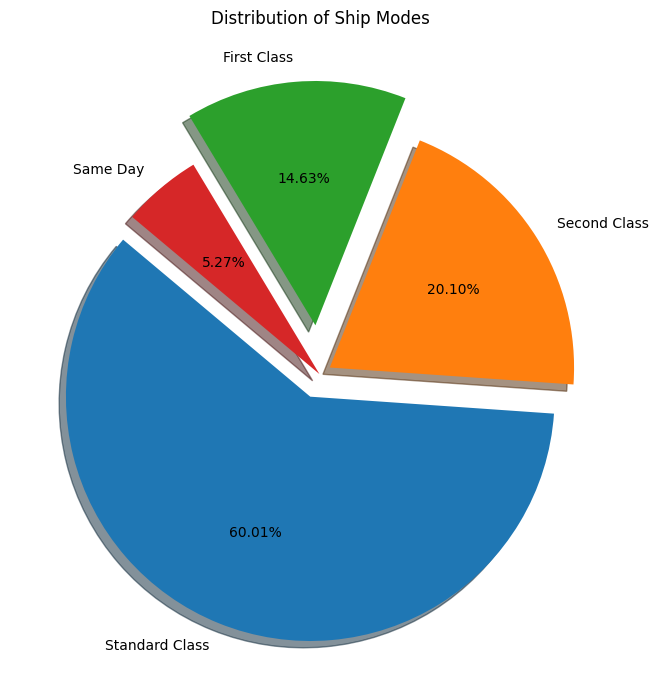

In [ ]:
# Sample data (replace this with your actual data)
ship_modes = list(df.ship_mode.value_counts().index)
ship_mode_counts = list(df.ship_mode.value_counts().values)
explode = (0.1, 0.05, 0.2, 0)  # Explode the first slice (Standard)

# Create a pie chart with shadows (2D effect)
plt.figure(figsize=(8, 8))
plt.pie(
    ship_mode_counts,
    labels=ship_modes,
    explode=explode,
    autopct='%1.2f%%',
    startangle=140,
    shadow=True
)

# Title and aspect ratio settings
plt.title('Distribution of Ship Modes\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

## Monthly Sales Trends

In [ ]:
monthly_sum_sales = df.groupby("months").agg({"sales($)": "sum"})
monthly_sum_sales

,sales($)
months,
Apr,659404.0
Aug,670788.0
Dec,693073.0
Feb,610240.0
Jan,676653.0
Jul,685152.0
Jun,664560.0
Mar,686681.0
May,672547.0


In [ ]:
ordered_months = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

Month_CI = pd.CategoricalIndex(
    monthly_sum_sales.index,
    ordered=True,
    categories=ordered_months
)

Month_CI

CategoricalIndex(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
                  'May', 'Nov', 'Oct', 'Sep'],
                 categories=['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True, dtype='category', name='months')

In [ ]:
monthly_sum_sales.index = Month_CI
monthly_sum_sales = monthly_sum_sales.sort_index()
monthly_sum_sales

,sales($)
months,
Jan,676653.0
Feb,610240.0
Mar,686681.0
Apr,659404.0
May,672547.0
Jun,664560.0
Jul,685152.0
Aug,670788.0
Sep,658844.0


In [ ]:
import matplotlib.ticker as ticker

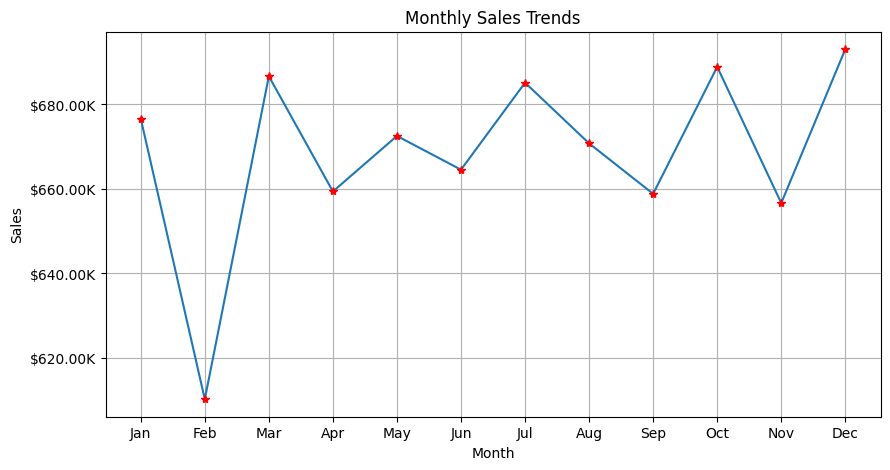

In [ ]:
# Create line chart for monthly sales
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    monthly_sum_sales.index,
    monthly_sum_sales["sales($)"],
    marker='*',
    mfc='red', # marker face color
    mec='red', # marker edge color
    linestyle='-'
)

ax.set_title('Monthly Sales Trends')
ax.set_xlabel('Month')
ax.set_ylabel('Sales')
ax.grid(True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.2f}'.format(x/1000) + 'K'))

# Show the line chart
fig.show()

Data Viz Color Palette Generator

In [ ]:
# https://www.learnui.design/tools/data-color-picker.html

## 1.&nbsp; **Order Priority Distribution**

Order Priority Distribution: Create a bar chart or a pie chart to show the distribution of order priorities.

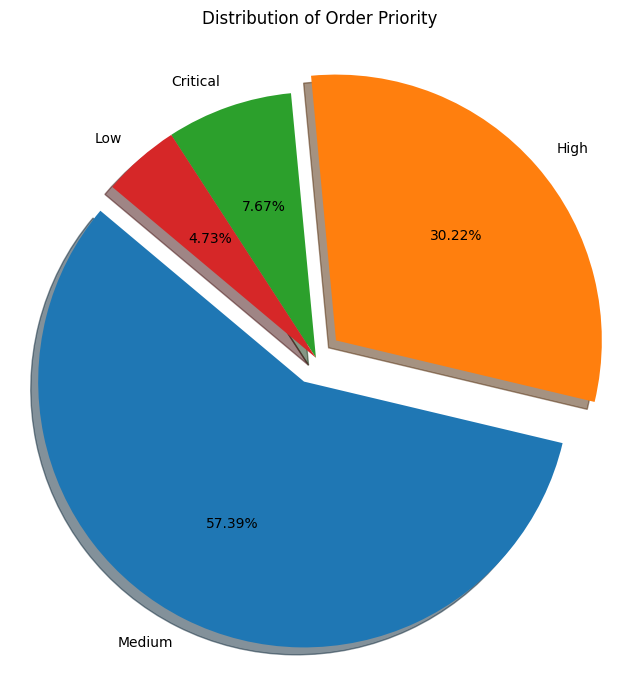

In [ ]:
# Sample data (replace this with your actual data)
order_priority = list(df.order_priority.value_counts().index)
order_priority_counts = list(df.order_priority.value_counts().values)
explode = (0.1, 0.1, 0, 0)  # Explode the first slice (Standard)

# Create a pie chart with shadows (2D effect)
plt.figure(figsize=(8, 8))
plt.pie(
    order_priority_counts,
    labels=order_priority,
    explode=explode,
    autopct='%1.2f%%',
    startangle=140,
    shadow=True
)

# Title and aspect ratio settings
plt.title('Distribution of Order Priority\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

## 2.&nbsp; **Product Category Distribution**

Product Category Distribution: Create a bar chart or a pie chart to show the distribution of Product Category.

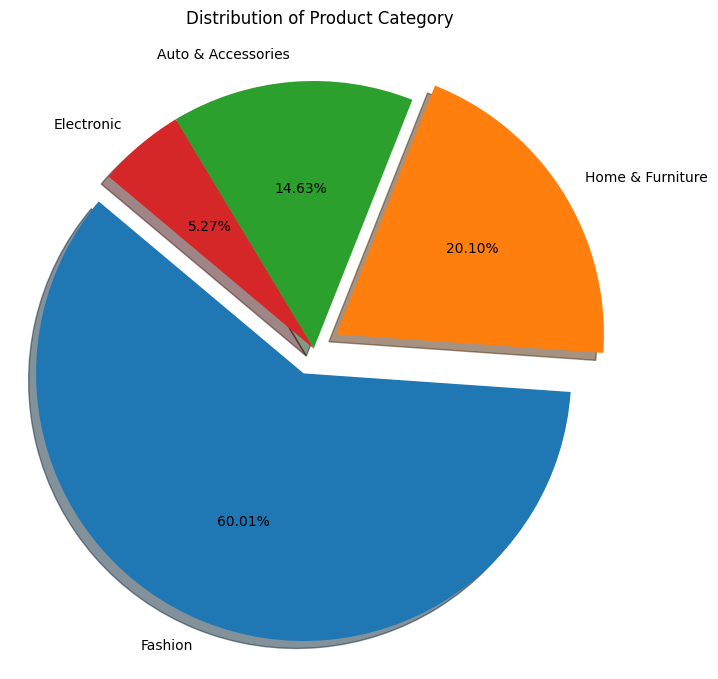

In [ ]:
# Sample data (replace this with your actual data)
product_category = list(df.product_category.value_counts().index)
product_category_counts = list(df.product_category.value_counts().values)
explode = (0.1, 0.1, 0, 0)  # Explode the first slice (Standard)

# Create a pie chart with shadows (2D effect)
plt.figure(figsize=(8, 8))
plt.pie(
    product_category_counts,
    labels=product_category,
    explode=explode,
    autopct='%1.2f%%',
    startangle=140,
    shadow=True
)

# Title and aspect ratio settings
plt.title('Distribution of Product Category\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

## 3.&nbsp; **Product Category vs. Profit**

Product Category vs. Profit: Use a bar chart or a grouped bar chart to compare sales or profit across different product categories.

In [ ]:
from matplotlib.ticker import FuncFormatter

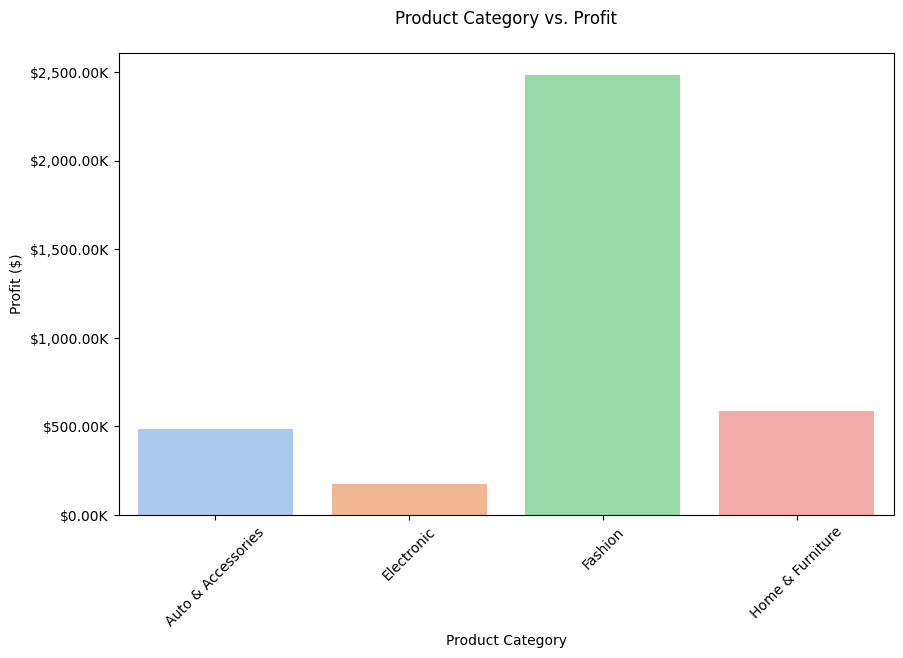

In [ ]:
# Sample data (replace this with your actual data)
product_category = df['product_category'].value_counts().index.tolist()
profit_group = df.groupby('product_category')['profit($)'].sum().reset_index()

# Fungsi lambda untuk mengubah nilai Y menjadi format mata uang
format_y_axis = lambda x, pos: '$' + '{:,.2f}'.format(x/1000) + 'K'

# Create a bar plot
plt.figure(figsize=(10, 6))  # Mengatur ukuran grafik
sns.barplot(
    x='product_category',
    y='profit($)',
    data=profit_group,
    palette='pastel'
)

# Title and axis label settings
plt.title('Product Category vs. Profit\n')
plt.xlabel('Product Category')
plt.ylabel('Profit ($)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))


# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the bar plot
plt.show()

## 4.&nbsp; **Order Date vs. Sales**

Order Date vs. Sales/Profit: Create a time series line plot to visualize how sales or profit has evolved over time. Use a bar chart to display monthly or quarterly sales or profit.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51294 entries, 0 to 51293
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          51294 non-null  object 
 1   order_date        51294 non-null  object 
 2   ship_date         51294 non-null  object 
 3   aging             51294 non-null  float64
 4   ship_mode         51294 non-null  object 
 5   product_category  51294 non-null  object 
 6   product           51294 non-null  object 
 7   sales($)          51294 non-null  float64
 8   quantity          51294 non-null  int64  
 9   discount          51294 non-null  float64
 10  profit($)         51294 non-null  float64
 11  shipping_cost($)  51294 non-null  float64
 12  order_priority    51294 non-null  object 
 13  customer_id       51294 non-null  object 
 14  customer_name     51294 non-null  object 
 15  segment           51294 non-null  object 
 16  city              51294 non-null  object

In [ ]:
# Mengkonversi kolom 'order_date' ke tipe data datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Membuat kolom baru 'year' dan 'month' berdasarkan 'order_date'
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Mengelompokkan data berdasarkan tahun dan bulan, dan menghitung total penjualan
year_month_sum_sales = df.groupby(['year', 'month'])['sales($)'].sum().reset_index()

year_month_sum_sales

,year,month,sales($)
0,2015,1,676313.0
1,2015,2,610240.0
2,2015,3,686681.0
3,2015,4,659193.0
4,2015,5,672547.0
5,2015,6,664560.0
6,2015,7,685152.0
7,2015,8,670999.0
8,2015,9,658844.0
9,2015,10,688905.0


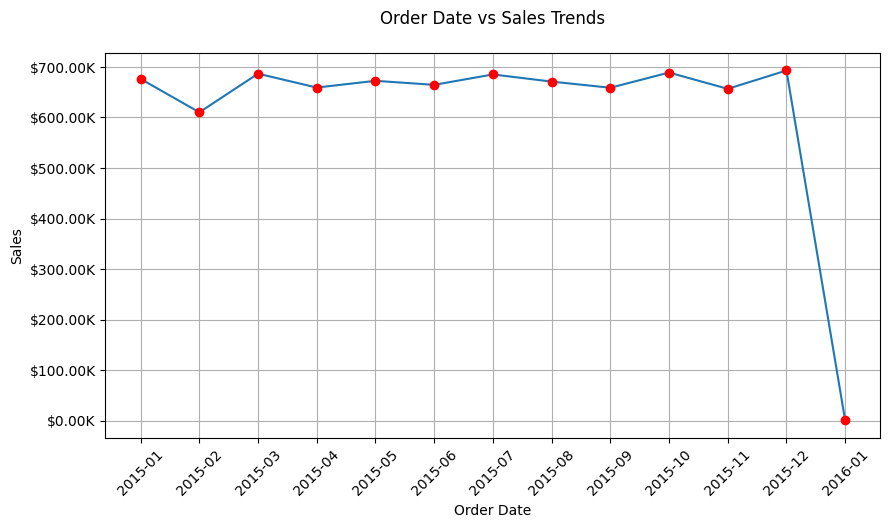

In [ ]:
# Mengatur format tanggal pada sumbu x menjadi "tahun-bulan"
date_labels = [f'{year}-{month:02}' for year, month in zip(year_month_sum_sales['year'], year_month_sum_sales['month'])]

# Create line chart for monthly sales
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    date_labels,
    year_month_sum_sales["sales($)"],
    marker='o',
    mfc='red', # marker face color
    mec='red', # marker edge color
    linestyle='-'
)

ax.set_title('Order Date vs Sales Trends\n')
ax.set_xlabel('Order Date')
ax.set_ylabel('Sales')
ax.grid(True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.2f}'.format(x/1000) + 'K'))

# Rotasi label-label sumbu x jika perlu
plt.xticks(rotation=45)

# Show the line chart
fig.show()

## 5.&nbsp; **Order Date vs. Profit**

Order Date vs. Sales/Profit: Create a time series line plot to visualize how sales or profit has evolved over time. Use a bar chart to display monthly or quarterly sales or profit.

In [ ]:
# Mengelompokkan data berdasarkan tahun dan bulan, dan menghitung total penjualan
year_month_sum_profit = df.groupby(['year', 'month'])['profit($)'].sum().reset_index()

year_month_sum_profit

,year,month,profit($)
0,2015,1,313582.7
1,2015,2,286113.8
2,2015,3,317202.6
3,2015,4,308278.2
4,2015,5,313766.5
5,2015,6,307597.3
6,2015,7,318715.9
7,2015,8,310558.3
8,2015,9,305349.4
9,2015,10,320759.9


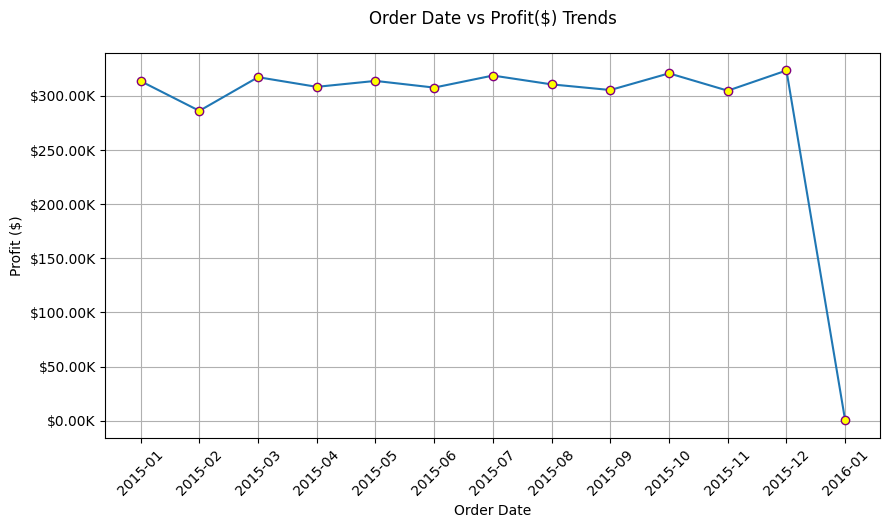

In [ ]:
# Mengatur format tanggal pada sumbu x menjadi "tahun-bulan"
date_labels = [f'{year}-{month:02}' for year, month in zip(year_month_sum_profit['year'], year_month_sum_profit['month'])]

# Create line chart for monthly sales
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    date_labels,
   year_month_sum_profit["profit($)"],
    marker='o',
    mfc='yellow', # marker face color
    mec='purple', # marker edge color
    linestyle='-'
)

ax.set_title('Order Date vs Profit($) Trends\n')
ax.set_xlabel('Order Date')
ax.set_ylabel('Profit ($)')
ax.grid(True)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$' + '{:,.2f}'.format(x/1000) + 'K'))

# Rotasi label-label sumbu x jika perlu
plt.xticks(rotation=45)

# Show the line chart
fig.show()

## 6.&nbsp; **Sales vs. Discount**

Sales vs. Quantity/Discount: Create scatter plots to visualize the relationship between sales and quantity or discount. You can use color-coding or size of points to represent different product categories.

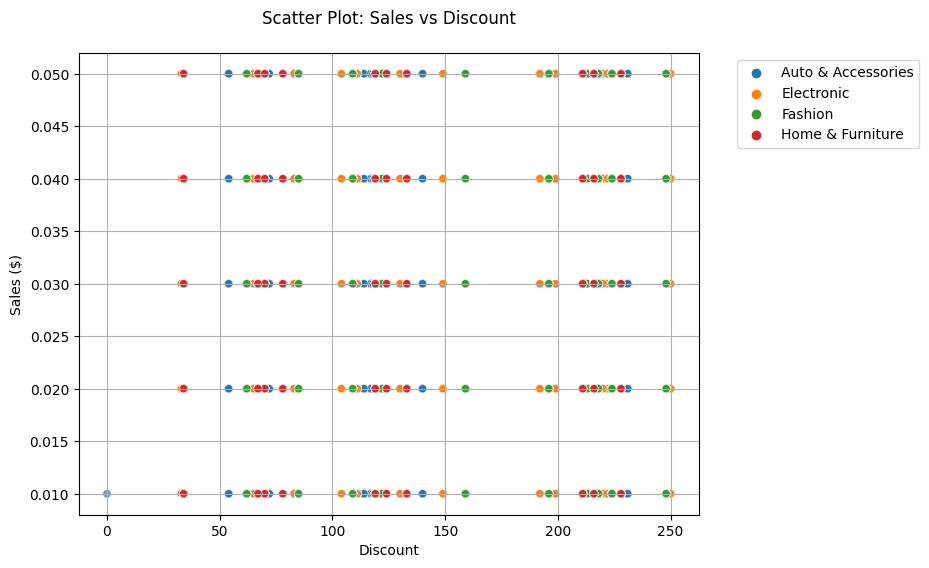

In [ ]:
#Mengatur Ukuran Plot
plt.figure(figsize=(8, 6))

#Membuat Scatter Plot
sns.scatterplot(
    data=df,
    x='sales($)',
    y='discount',
    hue='product_category',
    alpha=0.5
    )

plt.title('Scatter Plot: Sales vs Discount\n')
plt.xlabel('Discount')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


#Show Figure
plt.show()

## 7.&nbsp; **HeatMap Correlation**

<ipython-input-139-44e514de07c5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


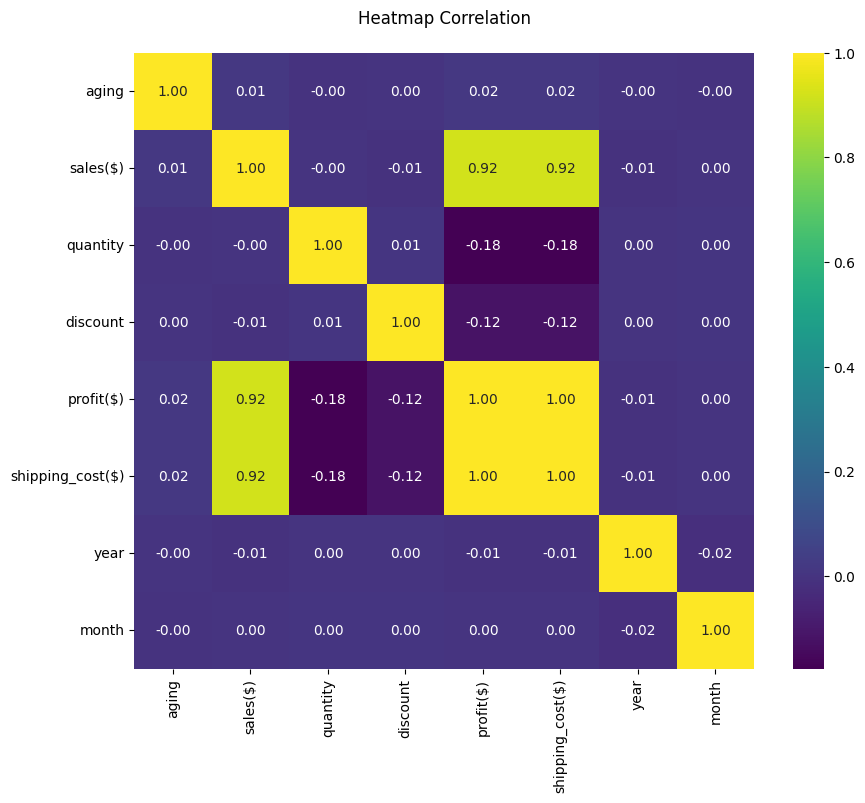

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Mengatur ukuran plot
plt.figure(figsize=(10, 8))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

# Menambahkan judul
plt.title("Heatmap Correlation\n")

# Menampilkan plot
plt.show()

# Homework Dasboard Looker Studio

Dashboard : [Link](https://lookerstudio.google.com/reporting/27c857c4-a259-414c-b949-3518581f04bd)